In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
sl=pd.read_csv('SpeedLimit.csv')                                                
track=pd.read_csv('Tracking.csv')  
sl.head()

,Unnamed: 0,Unnamed: 0.1,lat,lon,speed,timestamp,deviceidint,gpsage,hdop,satellitecount
0,0,0,40.048115,-75.050764,0.000000,1.301588e+09,2658,49122,0.9,10
1,1,1,40.048095,-75.050660,0.000000,1.301598e+09,2658,0,1.0,9
2,2,2,40.047819,-75.050680,3.728226,1.301599e+09,2658,0,1.2,8
3,3,3,40.052559,-75.074477,36.660889,1.301599e+09,2658,0,0.9,10
4,4,4,40.058153,-75.085590,0.000000,1.301601e+09,2658,0,0.9,11


In [2]:
#Filtering and droping unnecessary data
sl=sl[sl['speed']!=0]
track=track.dropna(subset=['speed_limit'])
sl.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)                      
track.drop(['Unnamed: 0'],axis=1,inplace=True) 
track.head()

,lat,lon,speed_limit
0,40.039174,-75.078913,25.0
1,40.096665,-75.073895,30.0
2,40.055604,-75.083939,30.0
3,40.002859,-75.059908,35.0
4,40.016215,-75.036965,30.0


In [3]:
#Need at least four satellites to narrowdown to a single spacetime. 
#I was reading hdop value greater than (5-10) are not significant.
sl=sl[sl.apply(lambda x: x.satellitecount>=4 and x.hdop<10,axis=1)]

In [4]:
#Rounding the numbers of latitude and longitude of two dataframe into same decimal places. I think precision within
# 4 decimal place will be accurate within few meters. 
sl[['lat','lon']] = sl[['lat','lon']].round(decimals=4)                         
track[['lat','lon']] = track[['lat','lon']].round(decimals=4)
track.head()


,lat,lon,speed_limit
0,40.0392,-75.0789,25.0
1,40.0967,-75.0739,30.0
2,40.0556,-75.0839,30.0
3,40.0029,-75.0599,35.0
4,40.0162,-75.0370,30.0


In [5]:
#Merging the speed_limit from Tracking.csv into SpeedLimit.csv by matching lat and lon
sltrack=pd.merge(sl,track,how='left',on=['lat','lon'])

In [7]:
#Dropping the nan value in speed_limit. I guess the nan value is due to unmatched lat and lon between SpeedLimit.csv and Tracking.csv.
sltrack=sltrack.dropna(subset=['speed_limit'])
sltrack.tail()

,lat,lon,speed,timestamp,deviceidint,gpsage,hdop,satellitecount,speed_limit
1330838,40.0096,-75.0940,11.050462,1.301783e+09,51388,0,0.8,15,30.0
1330843,40.0133,-75.0059,42.859686,1.302231e+09,51388,0,0.7,16,45.0
1330844,40.0133,-75.0059,42.859686,1.302231e+09,51388,0,0.7,16,65.0
1330850,40.0134,-74.9989,14.830883,1.302297e+09,51388,0,0.6,19,40.0
1330860,39.9863,-75.0690,29.639397,1.302302e+09,51493,0,0.9,10,40.0


In [8]:
#Create new dataframe with speeding vehicle only. And sorting the overspeed value in descending order.
overspeedlimit = sltrack[sltrack.apply(lambda x: x["speed"] > x["speed_limit"] , axis=1)] 
overspeedlimit['overspeed']=overspeedlimit.apply(lambda x: x['speed'] - x['speed_limit'],axis=1)                                                   
overspeedlimit.sort_values(by='overspeed',ascending=False).head()
#overspeedlimit

<ipython-input-8-87f1c3cac8f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overspeedlimit['overspeed']=overspeedlimit.apply(lambda x: x['speed'] - x['speed_limit'],axis=1)


,lat,lon,speed,timestamp,deviceidint,gpsage,hdop,satellitecount,speed_limit,overspeed
542158,40.0643,-75.0930,80.156859,1.302015e+09,26029,0,0.8,10,25.0,55.156859
539204,40.0185,-75.0610,77.671375,1.301863e+09,25284,0,1.0,10,25.0,52.671375
854412,40.0026,-75.0609,81.021807,1.302902e+09,29569,0,0.8,11,30.0,51.021807
854415,40.0026,-75.0609,81.021807,1.302902e+09,29569,0,0.8,11,30.0,51.021807
1191918,40.0643,-75.0930,75.541315,1.302120e+09,42581,0,0.7,18,25.0,50.541315


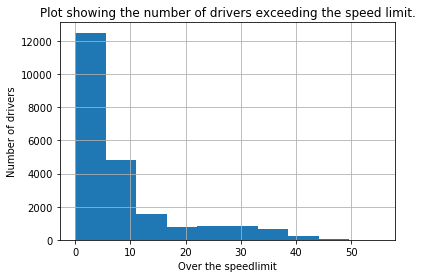

In [9]:
#Visualization
overspeedlimit['overspeed'].hist()
plt.xlabel('Over the speedlimit')
plt.ylabel('Number of drivers')
plt.title('Plot showing the number of drivers exceeding the speed limit.');

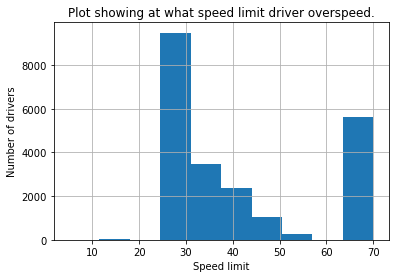

In [10]:
#Visualizing 
overspeedlimit['speed_limit'].hist()
plt.xlabel('Speed limit')
plt.ylabel('Number of drivers')
plt.title('Plot showing at what speed limit driver overspeed.');

In [11]:
#Checking how many times the driver exceeded the speed limit
overspeedlimit.deviceidint.value_counts().head(10)                                       

7141     218
7510     208
27022    194
7257     187
25732    187
26029    180
7170     172
25786    163
7129     153
6986     153
Name: deviceidint, dtype: int64

In [12]:
#average overspeeding by each drivers.
mean=overspeedlimit.groupby('deviceidint')['overspeed'].mean()
mean.sort_values(ascending=False).head(10)

deviceidint
42348    21.069240
37834    20.760090
51027    20.214728
5786     20.065083
29341    19.999532
7293     17.860083
5725     17.561022
7271     17.158874
26952    16.901219
13061    16.807664
Name: overspeed, dtype: float64